### The goal of this project is to predict the house price.

In [195]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
import sklearn.preprocessing as sklp
%matplotlib inline

# 1. Import the data into Pandas

In [196]:
data_train = pd.read_csv('/Users/carlicema/Documents/gitub_desktop/House-Price-Prediction/train.csv')

In [197]:
data_train.columns

Index([u'Id', u'MSSubClass', u'MSZoning', u'LotFrontage', u'LotArea',
       u'Street', u'Alley', u'LotShape', u'LandContour', u'Utilities',
       u'LotConfig', u'LandSlope', u'Neighborhood', u'Condition1',
       u'Condition2', u'BldgType', u'HouseStyle', u'OverallQual',
       u'OverallCond', u'YearBuilt', u'YearRemodAdd', u'RoofStyle',
       u'RoofMatl', u'Exterior1st', u'Exterior2nd', u'MasVnrType',
       u'MasVnrArea', u'ExterQual', u'ExterCond', u'Foundation', u'BsmtQual',
       u'BsmtCond', u'BsmtExposure', u'BsmtFinType1', u'BsmtFinSF1',
       u'BsmtFinType2', u'BsmtFinSF2', u'BsmtUnfSF', u'TotalBsmtSF',
       u'Heating', u'HeatingQC', u'CentralAir', u'Electrical', u'1stFlrSF',
       u'2ndFlrSF', u'LowQualFinSF', u'GrLivArea', u'BsmtFullBath',
       u'BsmtHalfBath', u'FullBath', u'HalfBath', u'BedroomAbvGr',
       u'KitchenAbvGr', u'KitchenQual', u'TotRmsAbvGrd', u'Functional',
       u'Fireplaces', u'FireplaceQu', u'GarageType', u'GarageYrBlt',
       u'GarageFinish',

# 2. Data cleaning

In [198]:
#Check missing data
total_missing = data_train.isnull().sum().sort_values(ascending = False)
prop = (data_train.isnull().sum() / data_train.isnull().count()).sort_values(ascending = False) #calculate the proportion and then sort
missing_data = pd.concat([total_missing, prop], axis = 1, keys = ['Total Missing', 'Proportion'])
missing_data.head(20)

,Total Missing,Proportion
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageCond,81,0.055479
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479


In [199]:
#Drop the missing data
data_train = data_train.drop((missing_data[missing_data['Total Missing'] > 1]).index, 1)
data_train = data_train.drop(data_train[data_train['Electrical'].isnull()].index)

# 3. Visualization

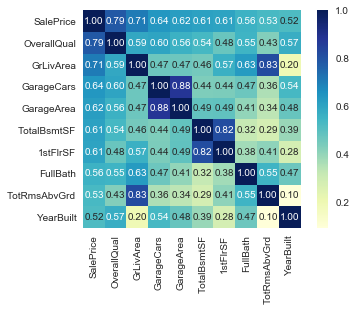

In [200]:
#Correlation visualization
#Only show the top 10 variables here
corrmap = data_train.corr()
columns = corrmap.nlargest(10, 'SalePrice')['SalePrice'].index
coff = np.corrcoef(data_train[columns].values.T)
heatmap = sns.heatmap(coff, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, cmap = 'YlGnBu', yticklabels=columns.values, xticklabels=columns.values)

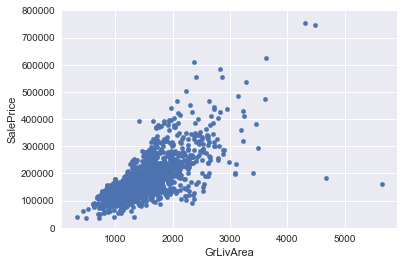

In [201]:
#Linear relationship analysis using scatter plot
#Selected variable = 'GrLivArea' 
data = pd.concat([data_train['SalePrice'], data_train['GrLivArea']], axis = 1)
data.plot.scatter(x = 'GrLivArea', y = 'SalePrice', ylim=(0,800000))

# 4. Normalization

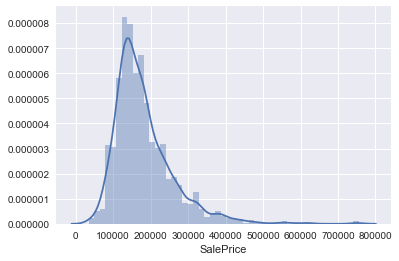

In [202]:
#Check the distribution of sale price and the selected variable
sns.distplot(data_train['SalePrice'])

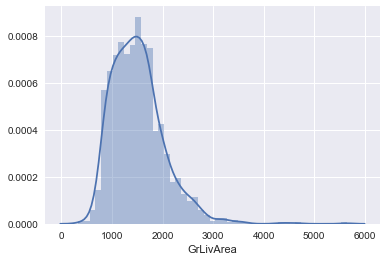

In [203]:
sns.distplot(data_train['GrLivArea'])

In [204]:
#Normalized the data using log transformation
data_train['SalePrice'] = np.log(data_train['SalePrice'])
data_train['GrLivArea'] = np.log(data_train['GrLivArea'])

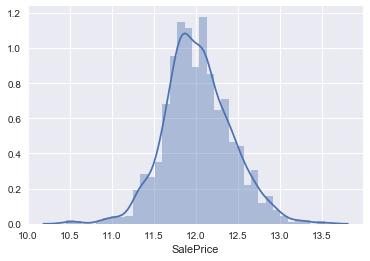

In [205]:
#Check the distribution after transformation
sns.distplot(data_train['SalePrice'])

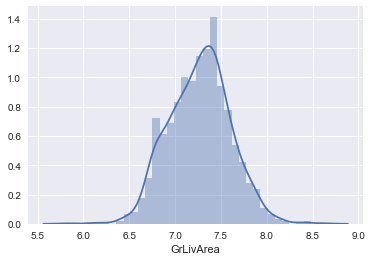

In [206]:
sns.distplot(data_train['GrLivArea'])

# 5. Regression

In [208]:
sns.distplot(data_train['SalePrice'], fit=norm)

NameError: name 'norm' is not defined